<h1><font color= 'Orange'>
    <span style="font-family:Candara">Clustering Assignment</span></font></h1> 

<h1><font color= 'Green'><span style="font-family:Candara">Problem Statement</span></font></h1>

- ___HELP___ International is an international humanitarian ___NGO___ that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

- After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

- We need to categorise the countries using some socio-economic and health factors that determine the overall development of the country. 

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">1. Library Handling</span>
    </font>
</h1>

- Let's start by importing the required libraries for working on the task. 

In [1]:
# warnings for filtering 
import warnings 
warnings.filterwarnings('ignore')

# importing numpy to deal with the mathematical operations on Arrays 
# importing pandas to deal with the data present in the form of DataFrames
import numpy as np
import pandas as pd 

# importing plotly for the data visualizations
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# importing sklearn classes required for K Means Clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# importing scipy classes required for Hierarchial clustering 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# importing necessary libraries required to calculate hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">2. Loading & Inspecting Data</span>
    </font>
</h1>

In [2]:
# loading the countries's data into dataframe 

df= pd.read_csv('Country-data.csv')

print('Data has been loaded into DataFrame !!')

Data has been loaded into DataFrame !!


In [3]:
# checking the head of df

df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
# checking the shape of df 

print('Number of rows in the dataframe: '+ str(df.shape[0]), end= '\n\n\n')

print('Number of columns in the dataframe: '+ str(df.shape[1]))

Number of rows in the dataframe: 167


Number of columns in the dataframe: 10


In [5]:
# chcecking the info of df 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# checking the describe of df 

df.describe(include= 'all')

country  child_mort     exports      health  \
count                              167  167.000000  167.000000  167.000000   
unique                             167         NaN         NaN         NaN   
top     St. Vincent and the Grenadines         NaN         NaN         NaN   
freq                                 1         NaN         NaN         NaN   
mean                               NaN   38.270060   41.108976    6.815689   
std                                NaN   40.328931   27.412010    2.746837   
min                                NaN    2.600000    0.109000    1.810000   
25%                                NaN    8.250000   23.800000    4.920000   
50%                                NaN   19.300000   35.000000    6.320000   
75%                                NaN   62.100000   51.350000    8.600000   
max                                NaN  208.000000  200.000000   17.900000   

           imports         income   inflation  life_expec   total_fer  \
count   167.000000     167.000000  167.000000  167.000000  167.000000   
unique         NaN            NaN         NaN         NaN         NaN   
top            NaN            NaN         NaN         NaN         NaN   
freq           NaN            NaN         NaN         NaN         NaN   
mean     46.890215   17144.688623    7.781832   70.555689    2.947964   
std      24.209589   19278.067698   10.570704    8.893172    1.513848   
min       0.065900     609.000000   -4.210000   32.100000    1.150000   
25%      30.200000    3355.000000    1.810000   65.300000    1.795000   
50%      43.300000    9960.000000    5.390000   73.100000    2.410000   
75%      58.750000   22800.000000   10.750000   76.800000    3.880000   
max     174.000000  125000.000000  104.000000   82.800000    7.490000   

                 gdpp  
count      167.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean     12964.155689  
std      18328.704809  
min        231.000000  
25%       1330.000000  
50%       4660.000000  
75%      14050.000000  
max     105000.000000

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

- This Dataset Contains the data of 167 countries.
- There are no nulls present in the Dataset.
- The columns exports, imports and health are in terms of percentages of GDP per capita.

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">3. Data Manipulation</span>
    </font>
</h1>

- Since the columns exports, health & imports are in terms of percentages of GDP per capita, we will multiply these columns with gdpp and divide it by 100. 

Let's proceed converting these columns. 

In [7]:
# converting the 3 columns 

df['exports']= df['exports'] * df['gdpp'] /100 
df['health']= df['health'] * df['gdpp'] /100 
df['imports']= df['imports'] * df['gdpp'] /100 

In [8]:
# let's describe the columns after converting the columns 

df.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [9]:
# let's drop the duplicate row's if there are any 

df.drop_duplicates(keep='first', inplace= True)

print('After dropping the duplicates: ', end='\n\n\n')

print('Number of rows in the dataframe: '+ str(df.shape[0]), end= '\n\n\n')

print('Number of columns in the dataframe: '+ str(df.shape[1]))

After dropping the duplicates: 


Number of rows in the dataframe: 167


Number of columns in the dataframe: 10


<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

- We have converted the columns exports, health & imports. 
- We found that there are no duplicate records in the dataset. 

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">4. Exploratory Data Analysis</span>
    </font>
</h1>

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">4.1. Univariate Analysis</span>
    </font>
</h2>

In [10]:
# let's define a function for plotting the univariate analysis 

def univ_num(col, bs):
    
    fig= ff.create_distplot([df[col]], [str(col).capitalize()], bin_size= bs)
    fig.update_layout(title_text= 'Distribution of '+str(col).capitalize())
    fig.show()

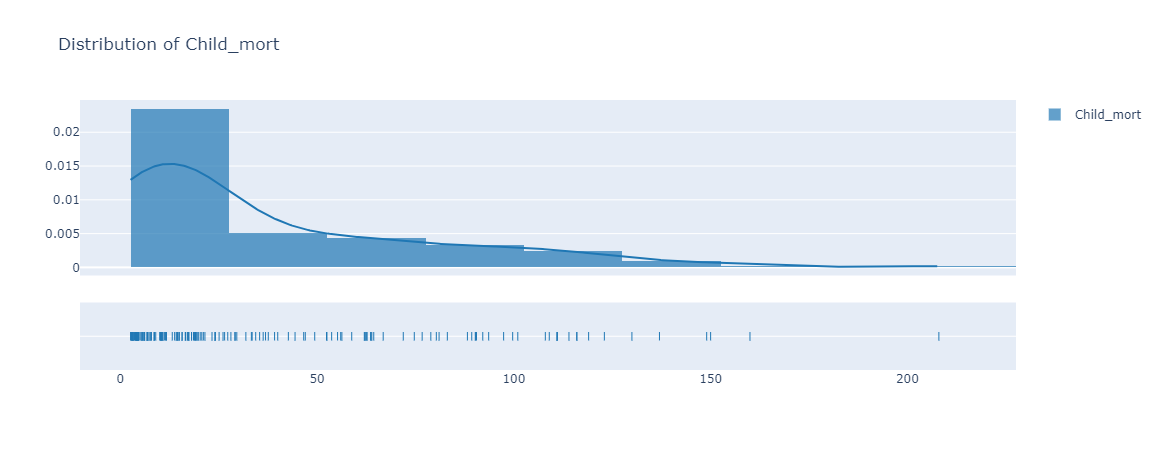

In [11]:
# let's check the distribution of child mortage

univ_num('child_mort', 25)

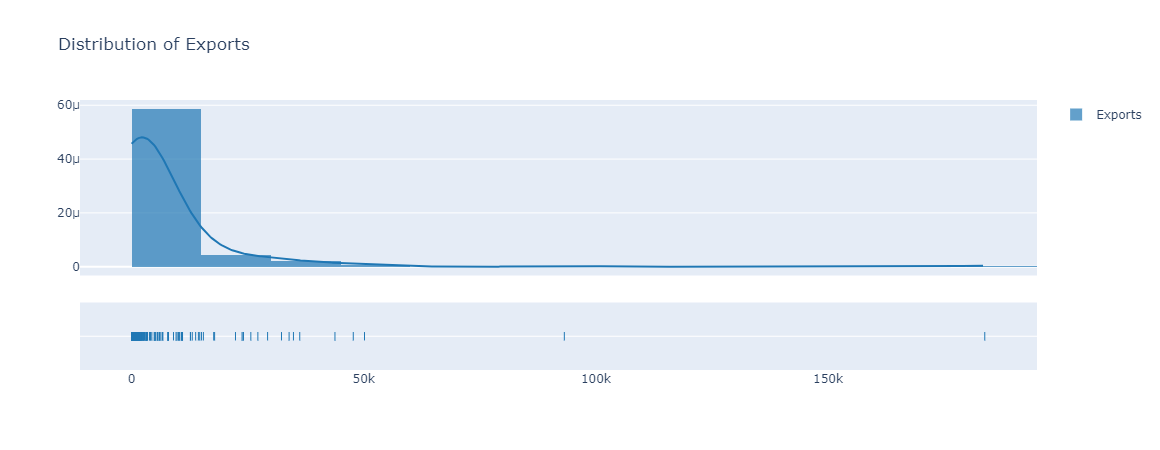

In [12]:
# let's check the distribution of exports

univ_num('exports', 15000)

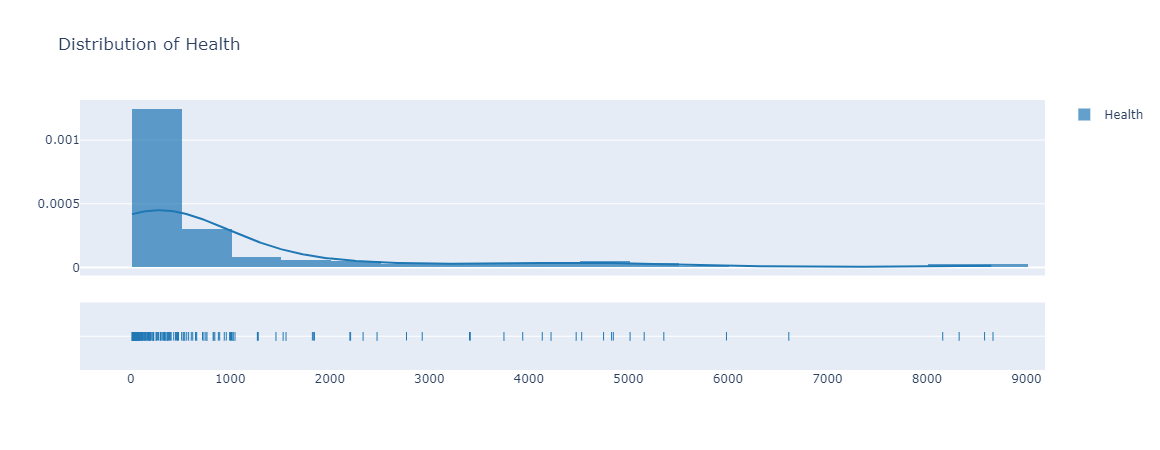

In [13]:
# let's check the distribution of health 

univ_num('health', 500)

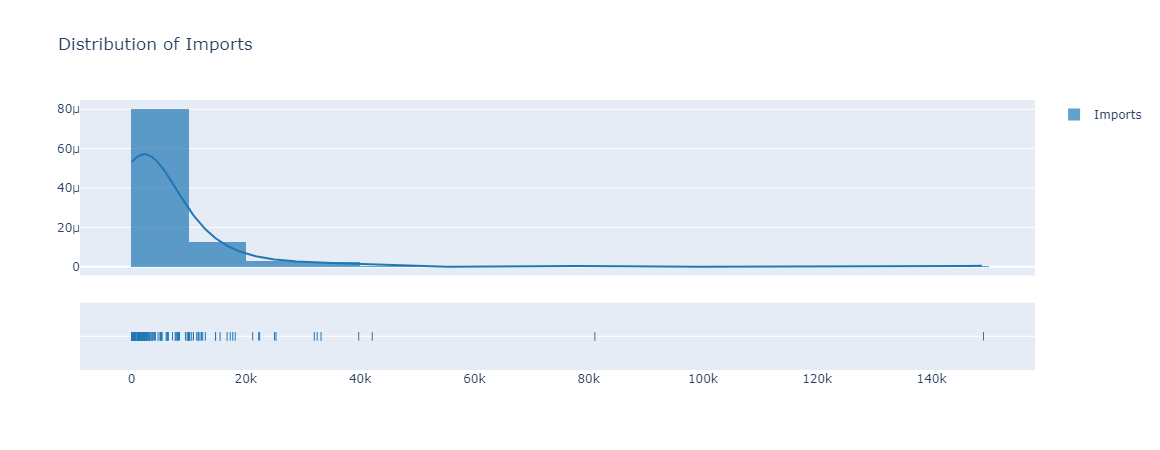

In [14]:
# let's check the distribution of imports

univ_num('imports', 10000)

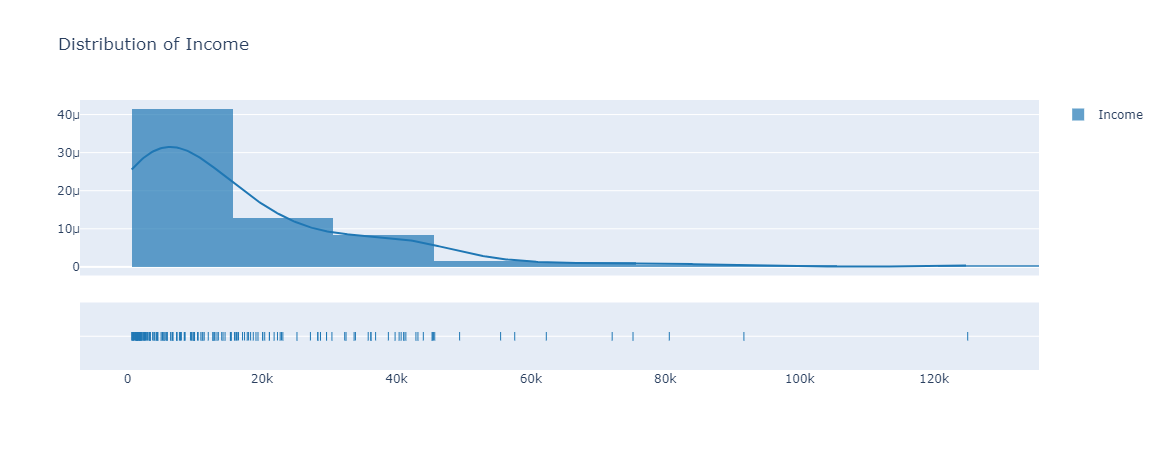

In [15]:
# let's check the distribution of income

univ_num('income', 15000)

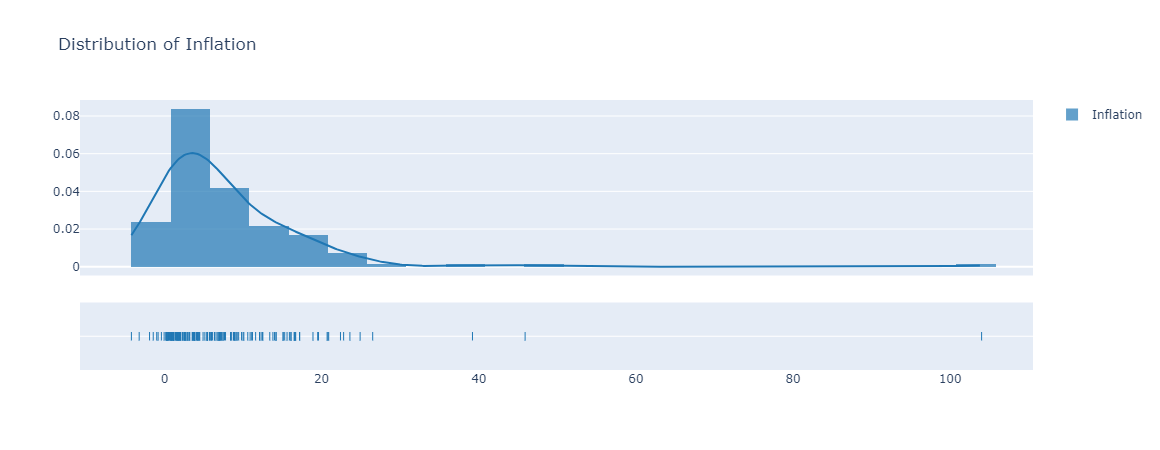

In [16]:
# let's check the distribution of inflation

univ_num('inflation', 5)

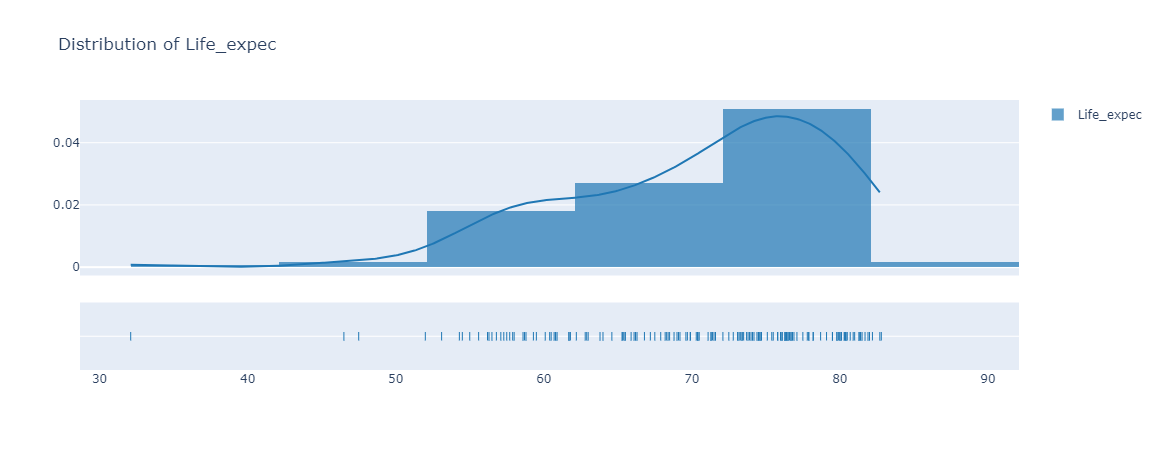

In [17]:
# let's check the distribution of life expectations

univ_num('life_expec', 10)

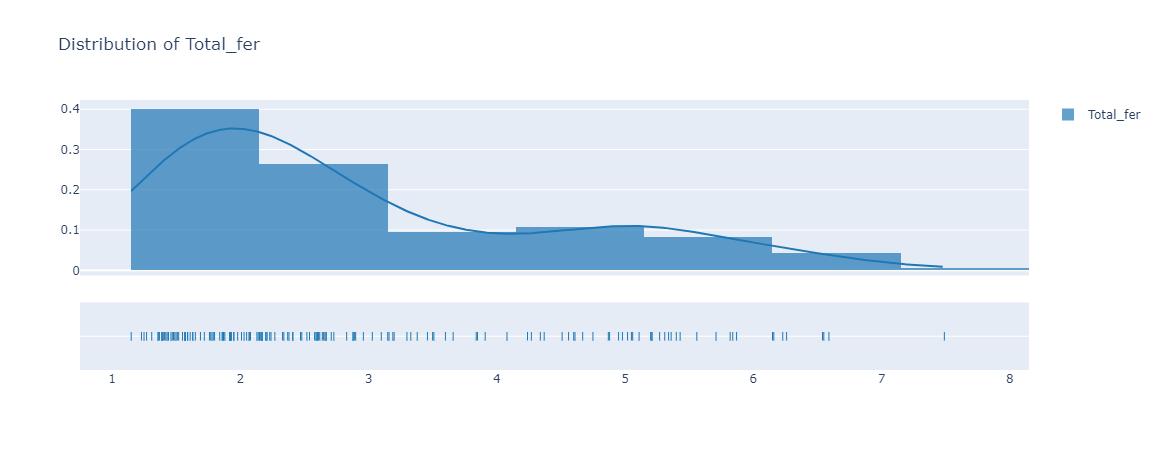

In [18]:
# let's check the distribution of total fertility

univ_num('total_fer', 1)

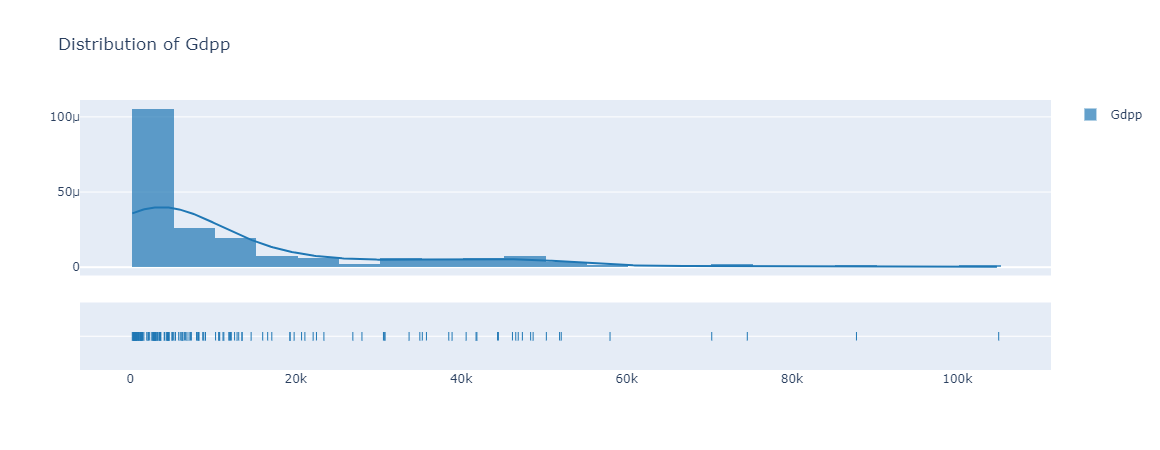

In [19]:
# let's check the distribution of gdpp 

univ_num('gdpp', 5000)

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

From the univariate analysis: 
- Life expectation is left skewed. 
- Remaining all the columns are right skewed.

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">4.2. Bivariate Analysis</span>
    </font>
</h2>

In [20]:
# let's define a function for plotting the bivariate analysis 

def biv_con_num(col):
    fig = px.scatter_geo(df, locations="country",
                         hover_name="country", size=col ,locationmode= 'country names', color= 'country',
                         projection="natural earth", width= 2000)
    fig.update_layout(title_text= 'Country Vise '+ str(col).title())
    fig.show()

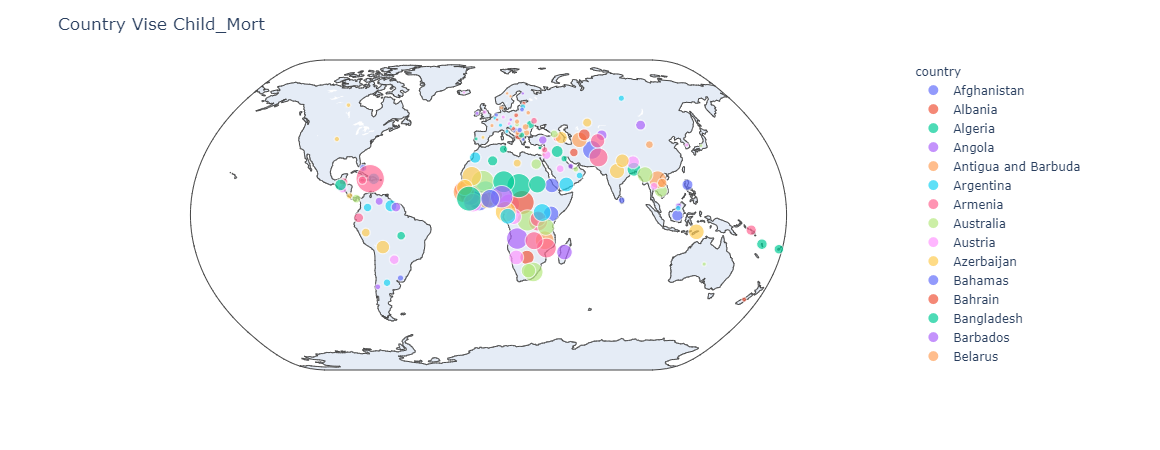

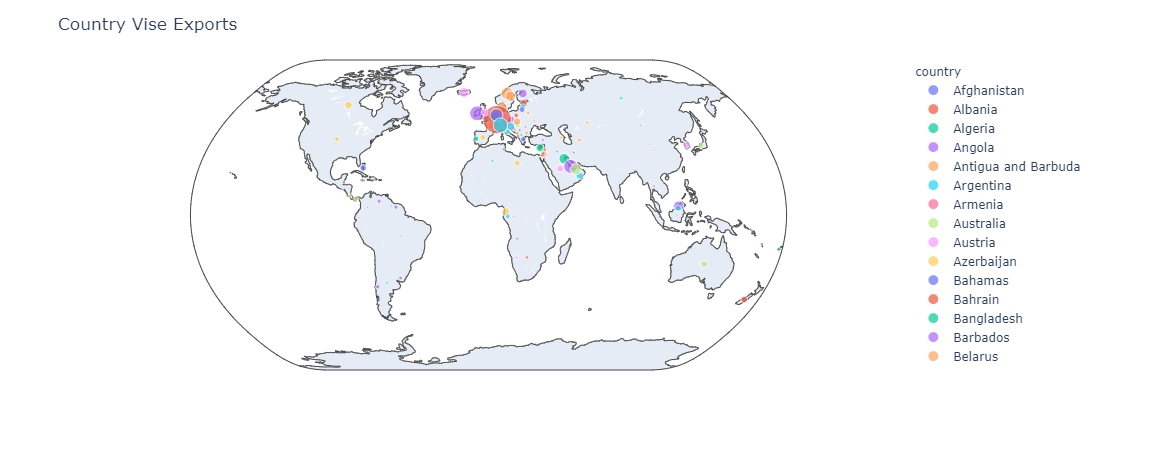

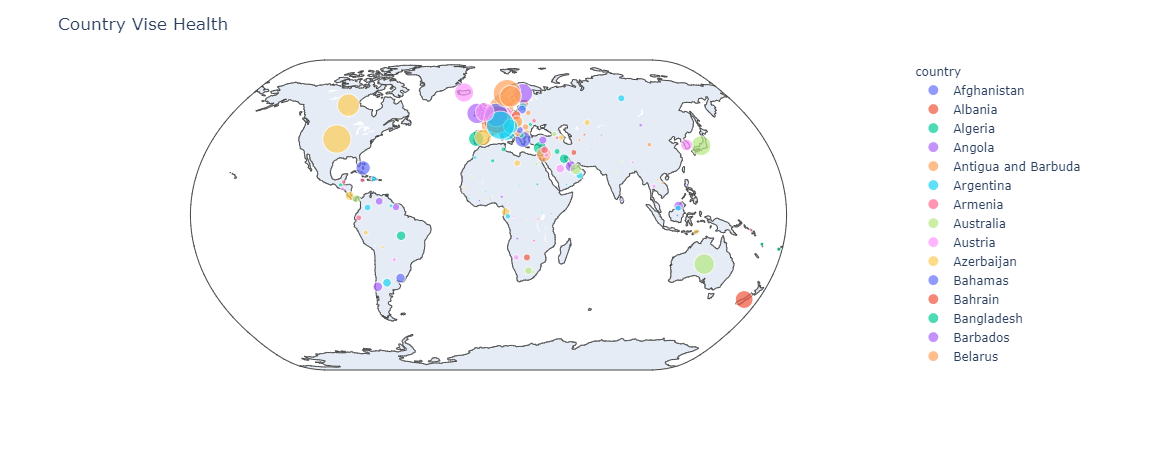

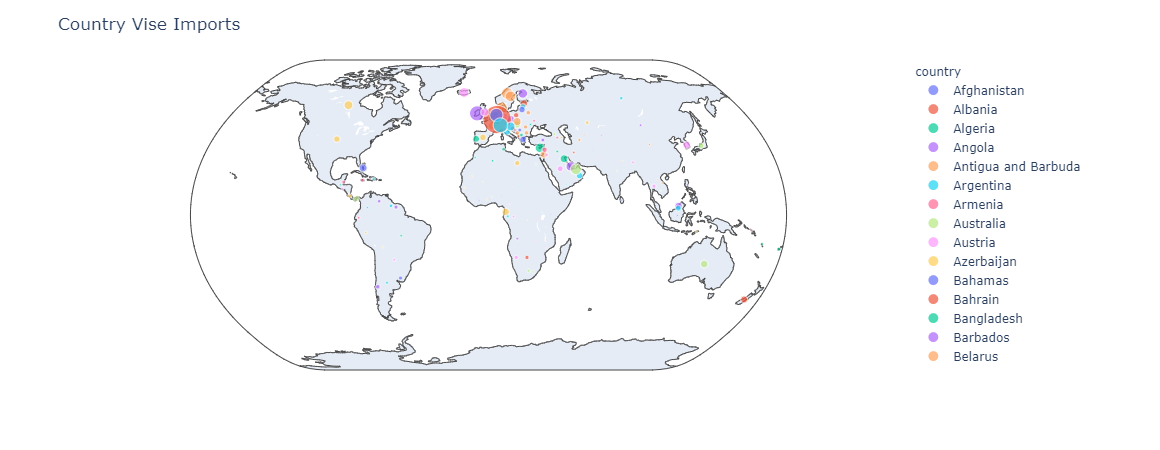

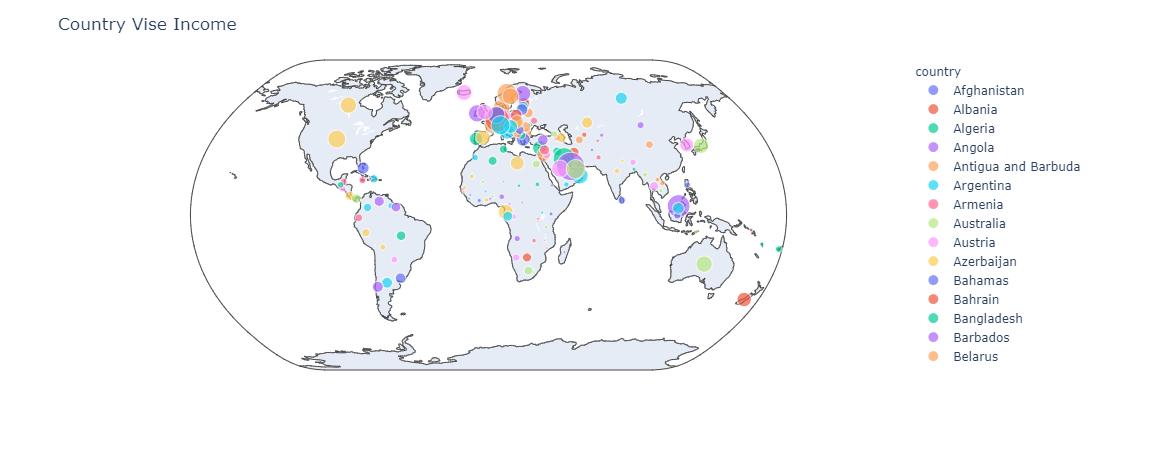

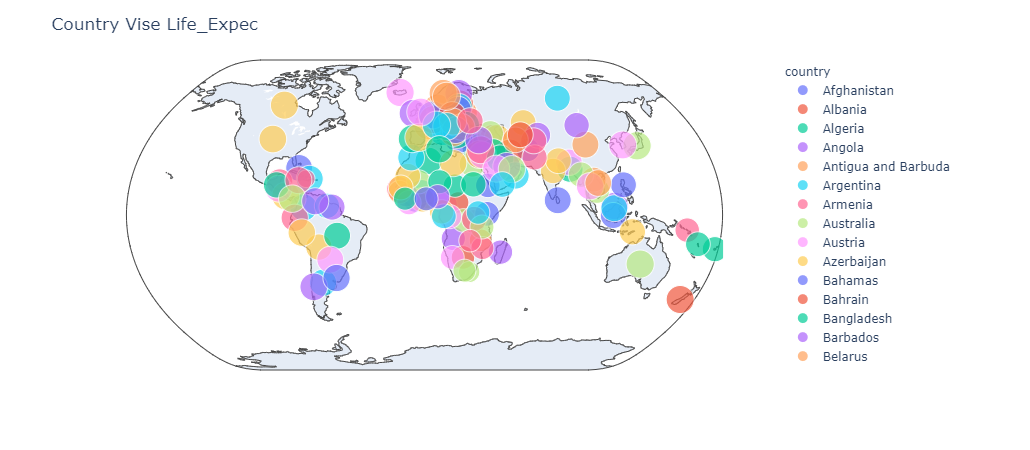

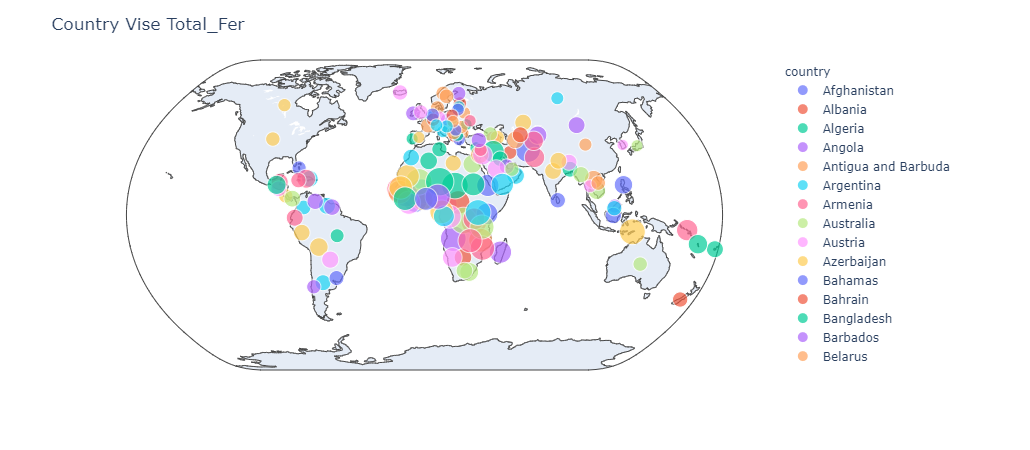

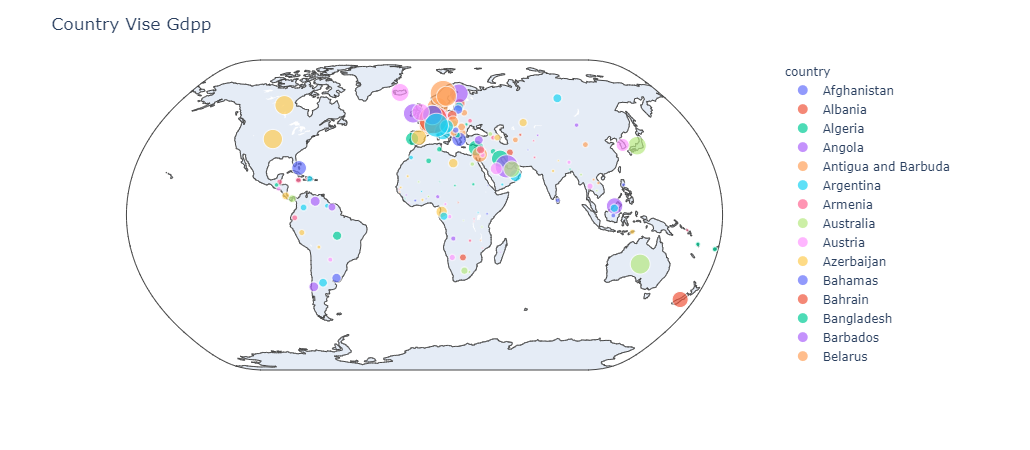

In [21]:
# let's plot the country vise associated features

columns= list(df.columns)
columns.remove('country')
columns.remove('inflation')

for col in columns: 
    biv_con_num(col)

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

From the bivariate analysis: 
- We have plotted the country vise features w.r.t size. 

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">4.3. Multivariate Analysis</span>
    </font>
</h2>

In [22]:
# let's make a list of numerical variables for performing different analysis

num_col = list(df.columns)
num_col.remove('country')

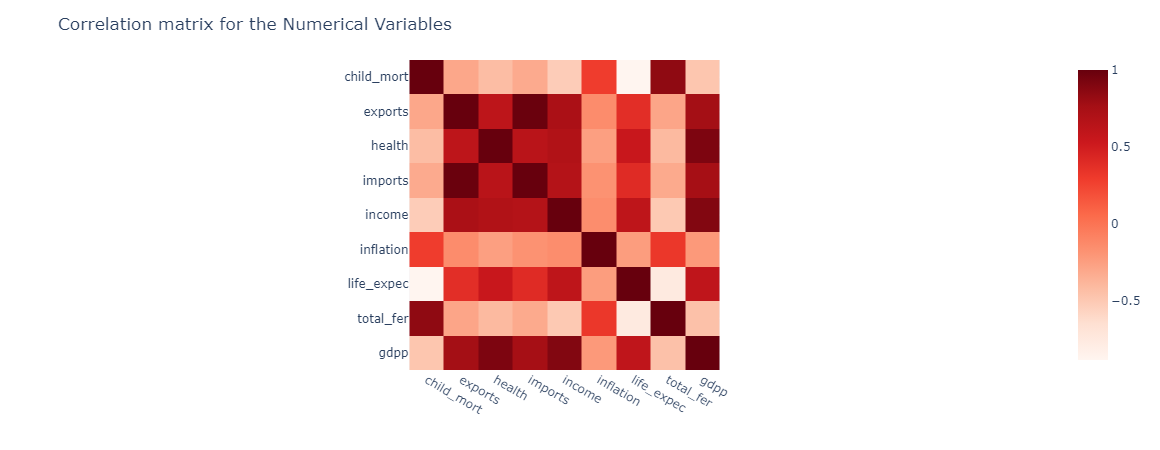

In [23]:
# let's plot the correlation matrox for all the numeric columns

fig= px.imshow(df.corr(), color_continuous_scale= 'reds')
fig.update_layout(title_text= 'Correlation matrix for the Numerical Variables')
fig.show()

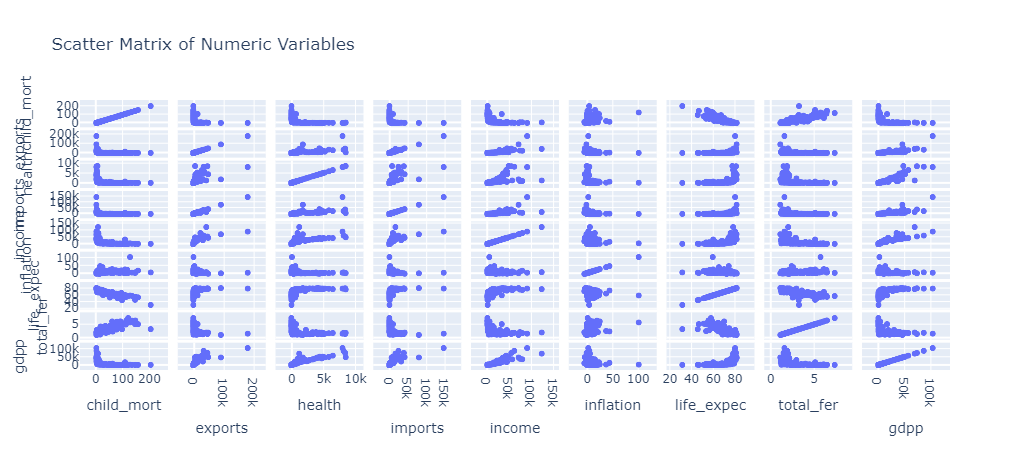

In [24]:
# plotting the pair plot for all the numeric columns 

fig= px.scatter_matrix(df[num_col], height= 1500, title= 'Scatter Matrix of Numeric Variables')
fig.show()

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

From the Multivariate analysis: 
- We could see that export, imports, health and income are having high correlation along with gdpp as well. 

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">5. Outlier Analysis</span>
    </font>
</h1>

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">5.1. Visualizing Outlier's</span>
    </font>
</h2>

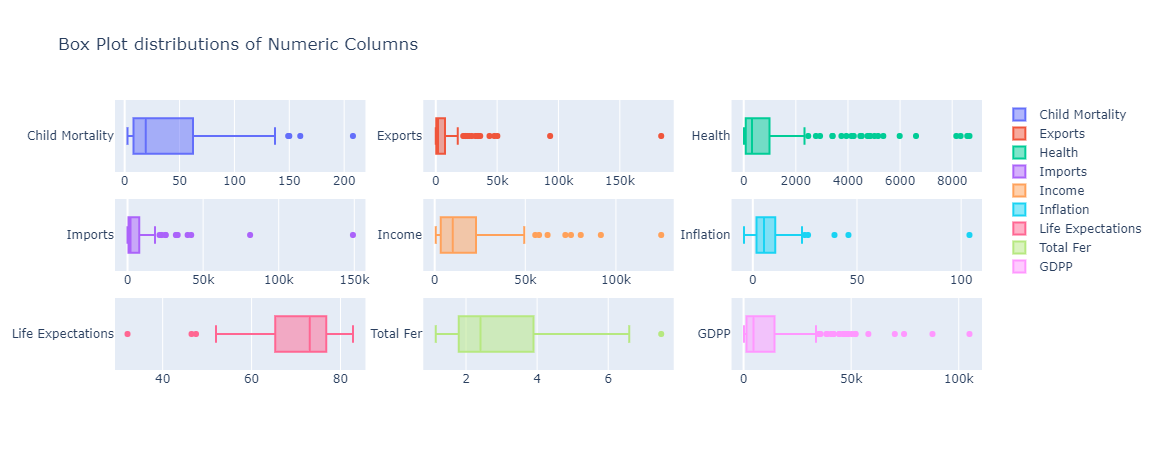

In [25]:
# let's plot the boxplot for the numeric columns to check the outliers

fig= make_subplots(rows= 3, cols= 3)
fig.add_trace(go.Box(x= df['child_mort'], name= 'Child Mortality'), 1, 1)
fig.add_trace(go.Box(x= df['exports'], name= 'Exports'), 1, 2)
fig.add_trace(go.Box(x= df['health'], name= 'Health'), 1, 3)
fig.add_trace(go.Box(x= df['imports'], name= 'Imports'), 2, 1)
fig.add_trace(go.Box(x= df['income'], name= 'Income'), 2, 2)
fig.add_trace(go.Box(x= df['inflation'], name= 'Inflation'), 2, 3)
fig.add_trace(go.Box(x= df['life_expec'], name= 'Life Expectations'), 3, 1)
fig.add_trace(go.Box(x= df['total_fer'], name= 'Total Fer'), 3, 2)
fig.add_trace(go.Box(x= df['gdpp'], name= 'GDPP'), 3, 3)
fig.update_layout(title_text= 'Box Plot distributions of Numeric Columns')

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

From the Boxplot Visualizations for the Outlier Analysis: 
- We could see that for all the numeric features except for Life Expectations, every other columns are having the outlier's on to the upper fence side.
- Whereas Life expectations is having outlier's on the lower fence side. 
- Since there is limited data available we can check the 98% values and max values so that it could be possible to cap the outlier's.

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">5.2. Outlier Treatment</span>
    </font>
</h2>

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Assumptions: </span>
    </font>
</h2>

- Exports, Imports, Health, Income & GDPP are capped to 98%. 
- Since Total Fertility has only 1 outlier we can ignore it. 
- If there is low life expectation's we need to deal with those countries. So, we can ignore the outlier's. 
- And also Child Mortality, Inflation outlier's can also be ignored. 

In [26]:
# let's check the quantile value's so that we can cap the outlier's

df[['exports', 'health', 'imports', 'income', 'gdpp']].quantile([0.02, 0.95, 0.98, 1])

exports       health      imports     income       gdpp
0.02      53.48304    18.438976     124.4188     837.68     364.32
0.95   31385.10000  4966.701000   24241.5600   48290.00   48610.00
0.98   46480.92800  7663.620000   37651.4000   74208.00   66364.00
1.00  183750.00000  8663.600000  149100.0000  125000.00  105000.00

In [27]:
# capping the outlier's on the upper fence to 98% 

upper_col = ['exports', 'health', 'imports', 'income', 'gdpp']

for i in upper_col: 
    q= df[i].quantile(0.98)
    df[i][df[i] >= q]= q

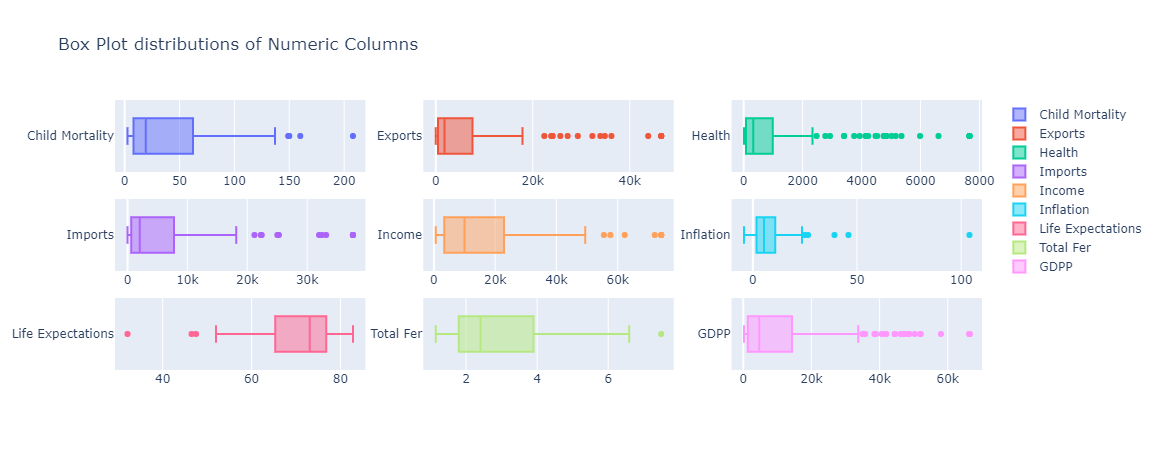

In [28]:
# let's plot the boxplot for the numeric columns to check the outliers

fig= make_subplots(rows= 3, cols= 3)
fig.add_trace(go.Box(x= df['child_mort'], name= 'Child Mortality'), 1, 1)
fig.add_trace(go.Box(x= df['exports'], name= 'Exports'), 1, 2)
fig.add_trace(go.Box(x= df['health'], name= 'Health'), 1, 3)
fig.add_trace(go.Box(x= df['imports'], name= 'Imports'), 2, 1)
fig.add_trace(go.Box(x= df['income'], name= 'Income'), 2, 2)
fig.add_trace(go.Box(x= df['inflation'], name= 'Inflation'), 2, 3)
fig.add_trace(go.Box(x= df['life_expec'], name= 'Life Expectations'), 3, 1)
fig.add_trace(go.Box(x= df['total_fer'], name= 'Total Fer'), 3, 2)
fig.add_trace(go.Box(x= df['gdpp'], name= 'GDPP'), 3, 3)
fig.update_layout(title_text= 'Box Plot distributions of Numeric Columns')

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

After the Outlier treatment with the soft capping: 
- We could see that there is not much high outlier's compared with the previous one's. 

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">6. Standardizing</span>
    </font>
</h1>

- For Standardizing the data we are using StandardScaler from sklearn.preprocessing. 
- Formula for the standard scaling is giving by: 

$$\text{scaling} = \frac{(x-mean)}{(standard deviation)}$$

In [29]:
# let's scale all the numeric columns using standard scaler 

#initiating the scaler 
scaler= StandardScaler()

# let's scale the columns 
df_scaled= scaler.fit_transform(df[num_col])

In [30]:
# let's check df_scaled 

df_scaled

array([[ 1.29153238, -0.60700492, -0.57845071, ..., -1.61909203,
         1.90288227, -0.72187203],
       [-0.5389489 , -0.5008812 , -0.44726577, ...,  0.64786643,
        -0.85997281, -0.50871936],
       [-0.27283273, -0.44562948, -0.49481806, ...,  0.67042323,
        -0.0384044 , -0.48642179],
       ...,
       [-0.37231541, -0.52054997, -0.5507676 , ...,  0.28695762,
        -0.66120626, -0.67625241],
       [ 0.44841668, -0.57412302, -0.56339163, ..., -0.34463279,
         1.14094382, -0.67625241],
       [ 1.11495062, -0.55979014, -0.55286328, ..., -2.09278484,
         1.6246091 , -0.66721286]])

In [31]:
# let's convert the numpy array's into dataframe 

df_scaled= pd.DataFrame(df_scaled)
df_scaled.columns= num_col

df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.607005 -0.578451 -0.650202 -0.870777   0.157336   -1.619092   
1   -0.538949 -0.500881 -0.447266 -0.439715 -0.390399  -0.312347    0.647866   
2   -0.272833 -0.445629 -0.494818 -0.510783 -0.218918   0.789274    0.670423   
3    2.007808 -0.398254 -0.544381 -0.496997 -0.623082   1.387054   -1.179234   
4   -0.695634 -0.071888 -0.175718  0.189295  0.139056  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.721872  
1  -0.859973 -0.508719  
2  -0.038404 -0.486422  
3   2.128151 -0.542467  
4  -0.541946 -0.019981

In [32]:
# let's describe the scaled df 

df_scaled.describe()

child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -2.659217e-17  4.587149e-17 -1.329608e-18  5.052512e-17 -3.988825e-18   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -6.122846e-01 -5.953417e-01 -6.801696e-01 -9.285728e-01   
25%   -7.466190e-01 -5.688514e-01 -5.571931e-01 -6.027769e-01 -7.700249e-01   
50%   -4.717981e-01 -4.393199e-01 -4.159228e-01 -4.327158e-01 -3.886669e-01   
75%    5.926666e-01  9.627048e-02 -3.564962e-02  2.538890e-01  3.526862e-01   
max    4.221297e+00  3.913466e+00  3.846115e+00  3.875892e+00  3.320870e+00   

          inflation    life_expec     total_fer          gdpp  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean   8.376533e-17  3.616535e-16  3.124580e-16 -8.642455e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -1.137852e+00 -4.337186e+00 -1.191250e+00 -7.412769e-01  
25%   -5.666409e-01 -5.927576e-01 -7.639023e-01 -6.750471e-01  
50%   -2.269504e-01  2.869576e-01 -3.564309e-01 -4.743691e-01  
75%    2.816364e-01  7.042584e-01  6.175252e-01  9.150698e-02  
max    9.129718e+00  1.380962e+00  3.009349e+00  3.244142e+00

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">7. Clustering Tendency Check Using Hopkins Statistic Score</span>
    </font>
</h1>

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Hopkins Statistic</span>
    </font>
</h2>
The Hopkins statistic, is a method which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [33]:
# defining a function to check the hopkins score if the data is having a clustering tendancy or not

def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
# let's check the hopkins score for the scaled df

print('The Hopkins score for the avaible data: ' +str(round(hopkins(df_scaled),2)))

The Hopkins score for the avaible data: 0.9


<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

From the Hopkins statistic that we have performed, since the score is above 0.8 this data is having high clustering tendency. 

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">8. Model Building</span>
    </font>
</h1>

For the Clustering Model Building we are using two techniques here: 
- K Means Clustering 
- Hierarchial Clustering

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">8.1. K Means Clustering</span>
    </font>
</h2>

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">K Means Clustering Procedure</span>
    </font>
</h2>

The steps involved in performing the K Means Clustering are: 
- Finding the Optimal number of clusters to define K
    - Elbow Method/SSD
    - Silhouette Analysis 
- Building the Model by using the Optimal Clusters
- Cluster Profiling/Visualization

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">Finding the Optimal Number of Clusters for K Means Modeling</span>
    </font>
</h2>

<h3>
    <font color= 'Orange'>
        <span style="font-family:Candara">Elbow Method/SSD </span>
    </font>
</h3>

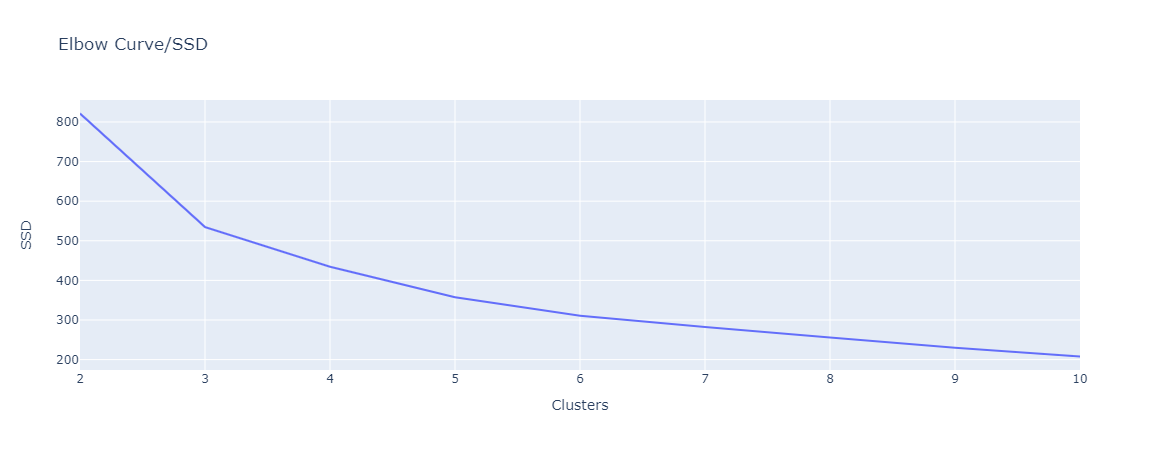

In [35]:
# let's find the optimal number of cluster's by plotting the SSD curver 

ssd = []
range_n_clusters = list(range(2,11))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state= 0)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)

fig= px.line(x= range_n_clusters, y= ssd, title= 'Elbow Curve/SSD', labels={'x': 'Clusters','y': 'SSD'})
fig.show()

<h3>
    <font color= 'Orange'>
        <span style="font-family:Candara">Silhouette Analysis</span>
    </font>
</h3>

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [36]:
# Also we perform silhouette analysis to check the optimal number of clusters
ss= []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state= 0)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, round(silhouette_avg,3)))
    ss.append(round(silhouette_avg,3))

For n_clusters=2, the silhouette score is 0.487
For n_clusters=3, the silhouette score is 0.423
For n_clusters=4, the silhouette score is 0.405
For n_clusters=5, the silhouette score is 0.416
For n_clusters=6, the silhouette score is 0.316
For n_clusters=7, the silhouette score is 0.324
For n_clusters=8, the silhouette score is 0.317
For n_clusters=9, the silhouette score is 0.296
For n_clusters=10, the silhouette score is 0.286


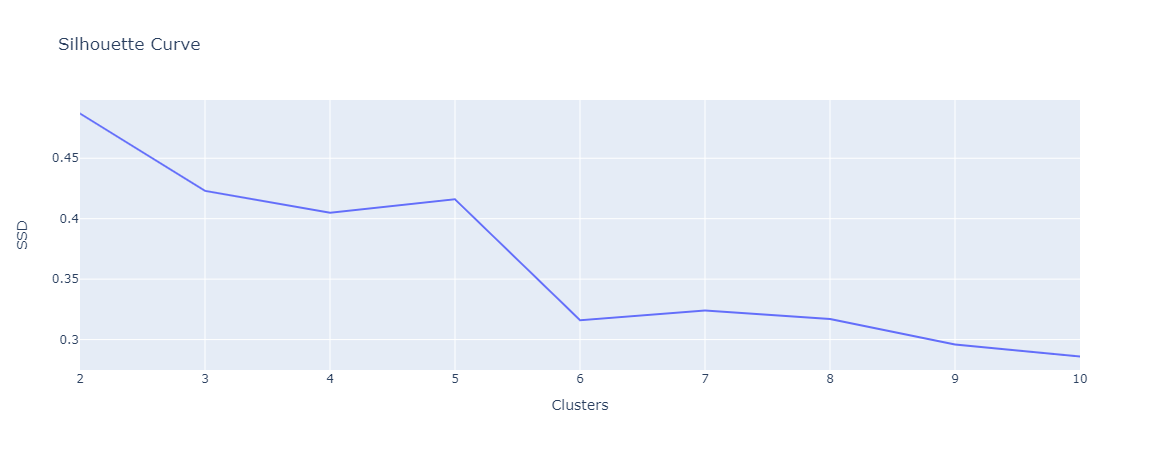

In [37]:
# let's plot the Sihouette Curve 

fig= px.line(x= range_n_clusters, y= ss, title= 'Silhouette Curve', labels={'x': 'Clusters','y': 'SSD'})
fig.show()

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

From the above SSD Curve & Silhouette Curve we can choose the Optimal Number of Clusters as 3. 

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">K Means Model Building using Optimal Clusters</span>
    </font>
</h2>

In [38]:
# building a model using K= 3

kmeans1= KMeans(n_clusters= 3, max_iter= 50, random_state= 0)
kmeans1.fit(df_scaled)
    
cluster_labels = kmeans1.labels_

In [39]:
# assigning the cluster Label's to df_copy 

df['K_Cluster']= cluster_labels

df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  K_Cluster  
0       9.44        56.2       5.82    553.0          0  
1       4.49        76.3       1.65   4090.0          1  
2      16.10        76.5       2.89   4460.0          1  
3      22.40        60.1       6.16   3530.0          0  
4       1.44        76.8       2.13  12200.0          1

In [40]:
# let's name the Clusters 

df['K_Cluster']= df['K_Cluster'].map({0:'Cluster 1', 1:'Cluster 2', 2: 'Cluster 3'})
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  K_Cluster  
0       9.44        56.2       5.82    553.0  Cluster 1  
1       4.49        76.3       1.65   4090.0  Cluster 2  
2      16.10        76.5       2.89   4460.0  Cluster 2  
3      22.40        60.1       6.16   3530.0  Cluster 1  
4       1.44        76.8       2.13  12200.0  Cluster 2

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">Cluster Profiling of K Means</span>
    </font>
</h2>

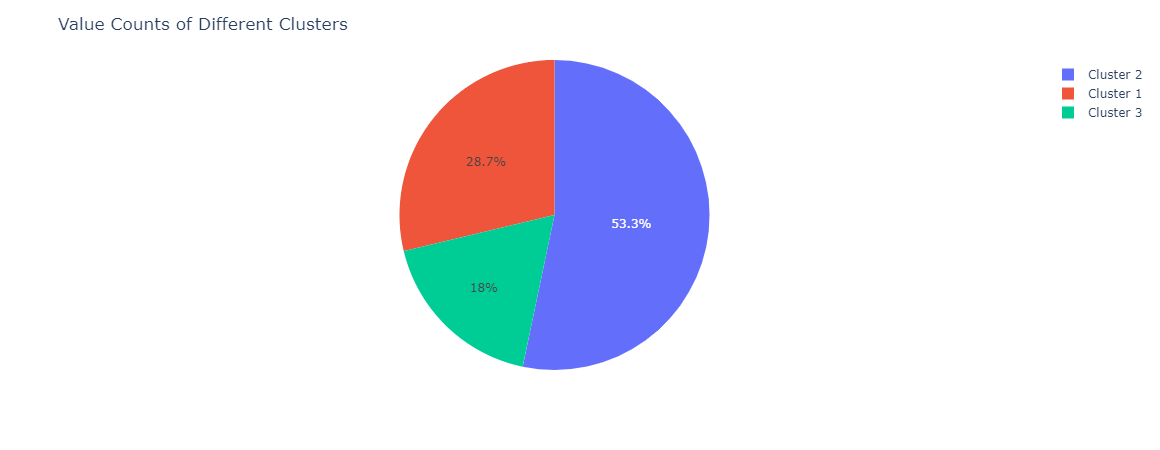

In [41]:
# let's plot the value counts of K Means clusters 

fig= px.pie(names= df['K_Cluster'].value_counts().index, values= df['K_Cluster'].value_counts())
fig.update_layout(title_text= 'Value Counts of Different Clusters')
fig.show()

In [42]:
#calculating mean of the required columns(child_mort, income, gdpp) for comparison

Cluster_GDPP=pd.DataFrame(df.groupby(["K_Cluster"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(df.groupby(["K_Cluster"]).child_mort.mean())
Cluster_income=pd.DataFrame(df.groupby(["K_Cluster"]).income.mean())
K_mean_df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income], axis=1)
K_mean_df

gdpp  child_mort        income
K_Cluster                                        
Cluster 1   1909.208333   91.610417   3897.354167
Cluster 2   7552.494382   20.726966  13626.853933
Cluster 3  44298.533333    4.970000  46254.400000

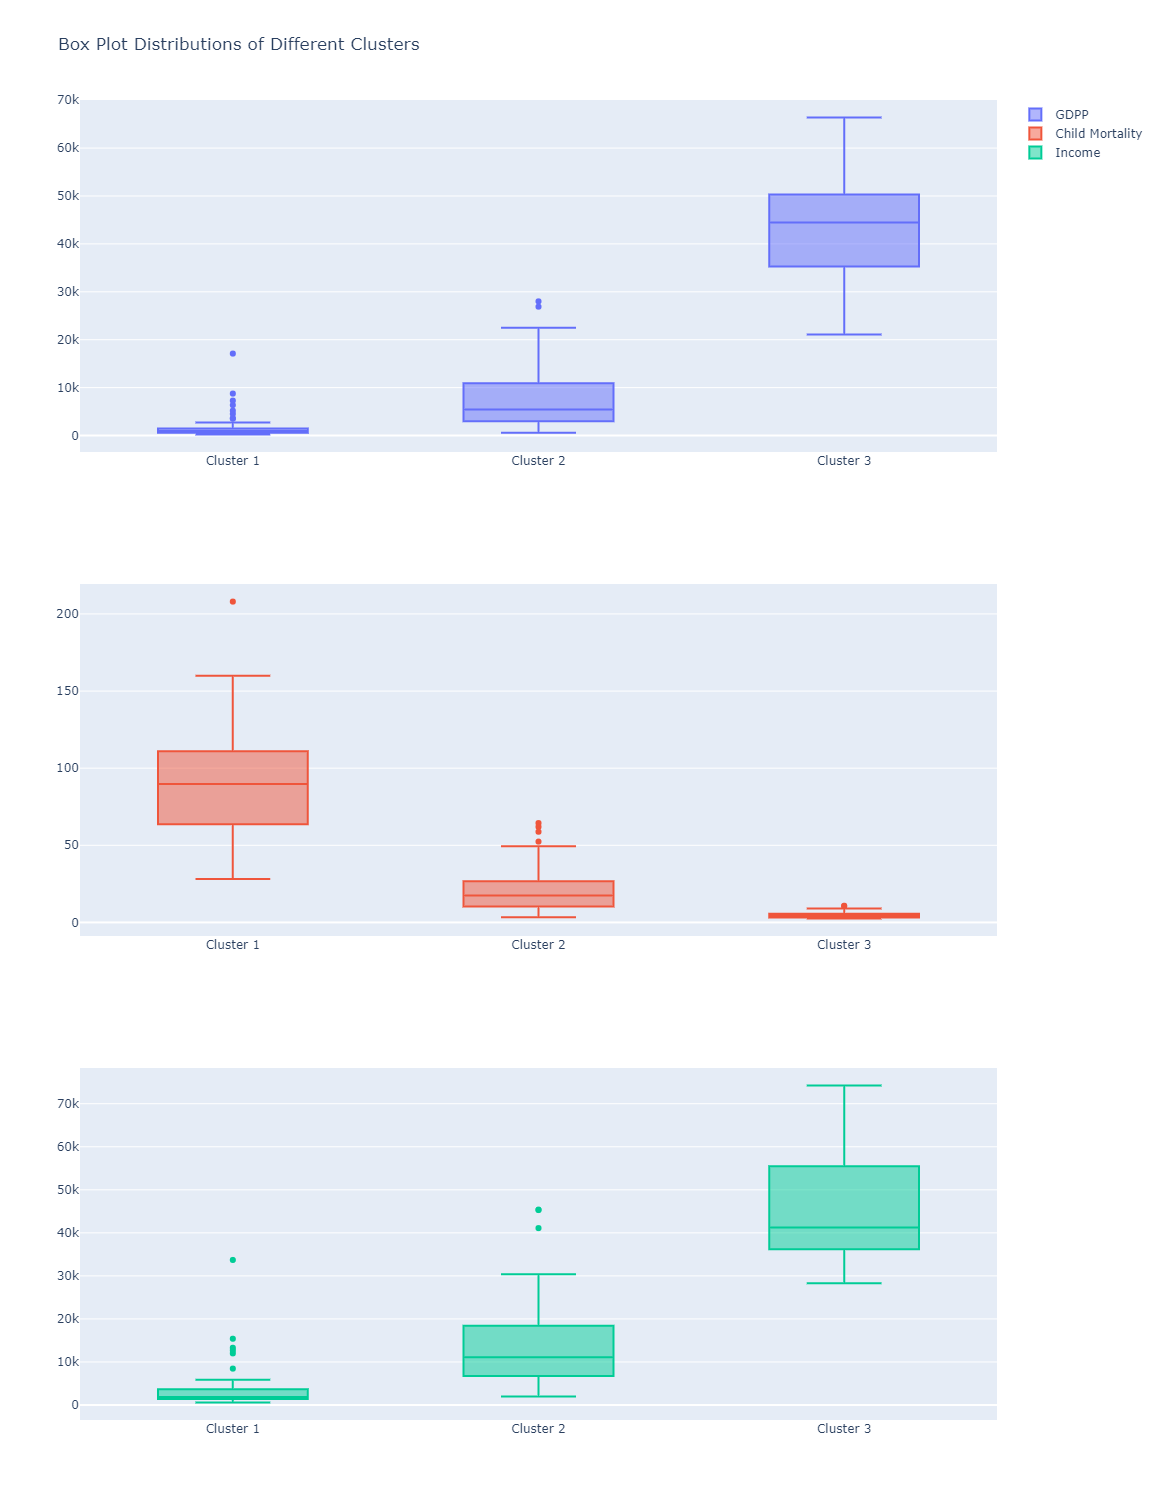

In [43]:
# let's plot the different boxplots of different clusters 

fig= make_subplots(rows= 3, cols= 1)
fig.add_trace(go.Box(y= df['gdpp'],x= df['K_Cluster'], name= 'GDPP'), 1, 1)
fig.add_trace(go.Box(y= df['child_mort'],x= df['K_Cluster'], name= 'Child Mortality'), 2, 1)
fig.add_trace(go.Box(y= df['income'], x= df['K_Cluster'], name= 'Income'), 3, 1)
fig.update_layout(title_text= 'Box Plot Distributions of Different Clusters', height= 1500)
fig.show()

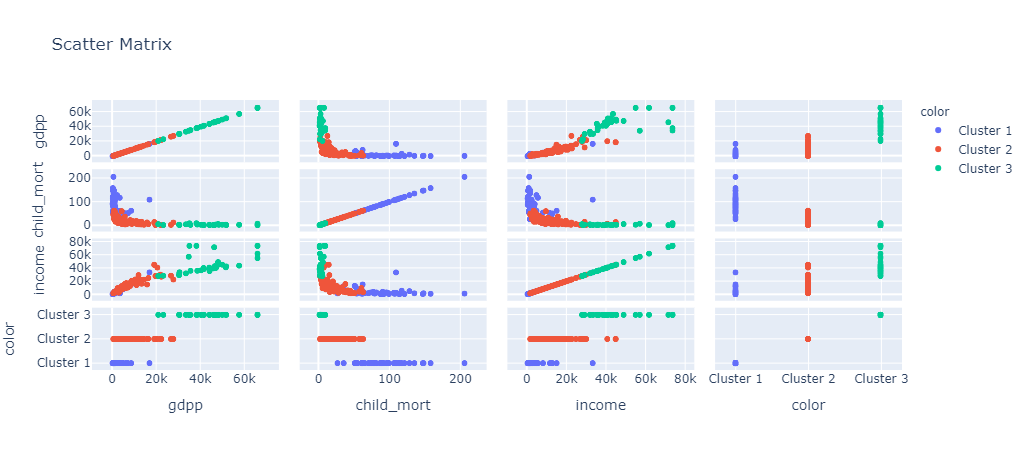

In [44]:
# let's plot the scatter matrix 

fig= px.scatter_matrix(df[['gdpp', 'child_mort', 'income']], color= df['K_Cluster'], title= 'Scatter Matrix', height= 1000)
fig.show()

In [45]:
# let's split the Cluster's 

cluster1_K= df[df['K_Cluster']== 'Cluster 1']
cluster2_K= df[df['K_Cluster']== 'Cluster 2']
cluster3_K= df[df['K_Cluster']== 'Cluster 3']

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

From the above Cluster Profiling we could see that, 
- Cluster 3 is having the higher mean of GDPP, Income and low Child Mortality 
- Cluster 2 is having slightly lesser mean of GDPP, Income and little higher Child Mortality 
- Cluster 1 is having very less mean of GDPP, Income and very high Child Mortality 

Based on these factors we could see that Cluster 1 is indeed need of financial aid. 

Let's also perform Hierarchial Clustering so that we can select the type of Clustering Needed. 

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">8.2. Hierarchial Clustering</span>
    </font>
</h2>

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">Hierarchial Clustering Procedure</span>
    </font>
</h2>

The steps involved in performing the Hierarchial Clustering are: 
- Need to build the model using 
    - Single Linkage 
    - Complete Linkage
- Select the type of Linkage
- Cluster Profiling/Visualization

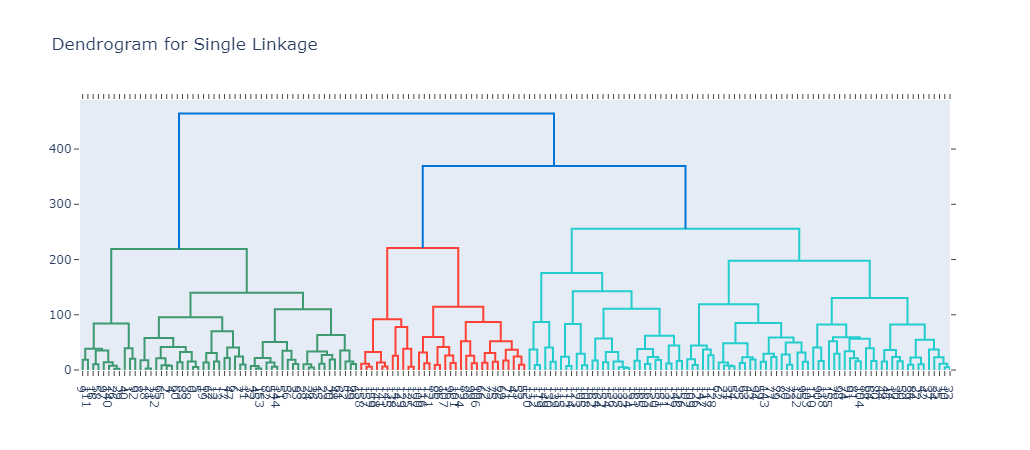

In [46]:
# let's build the Hierarchial Clustering using Single linkage

mergings_single= linkage(df_scaled, method= 'single', metric= 'euclidean')

fig= ff.create_dendrogram(mergings_single)
fig.update_layout(title_text= 'Dendrogram for Single Linkage', width= 1500)
fig.show()

In [47]:
# Checking the cluster labels and merge it data frame 

cluster_labels_single = cut_tree(mergings_single, n_clusters=3).reshape(-1, )
cluster_labels_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
# adding cluster labels to df

df['H_Cluster_Single']= cluster_labels_single

In [49]:
# let's name the Clusters 

df['H_Cluster_Single']= df['H_Cluster_Single'].map({0:'Cluster 1', 1:'Cluster 2', 2: 'Cluster 3'})
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  K_Cluster H_Cluster_Single  
0       9.44        56.2       5.82    553.0  Cluster 1        Cluster 1  
1       4.49        76.3       1.65   4090.0  Cluster 2        Cluster 1  
2      16.10        76.5       2.89   4460.0  Cluster 2        Cluster 1  
3      22.40        60.1       6.16   3530.0  Cluster 1        Cluster 1  
4       1.44        76.8       2.13  12200.0  Cluster 2        Cluster 1

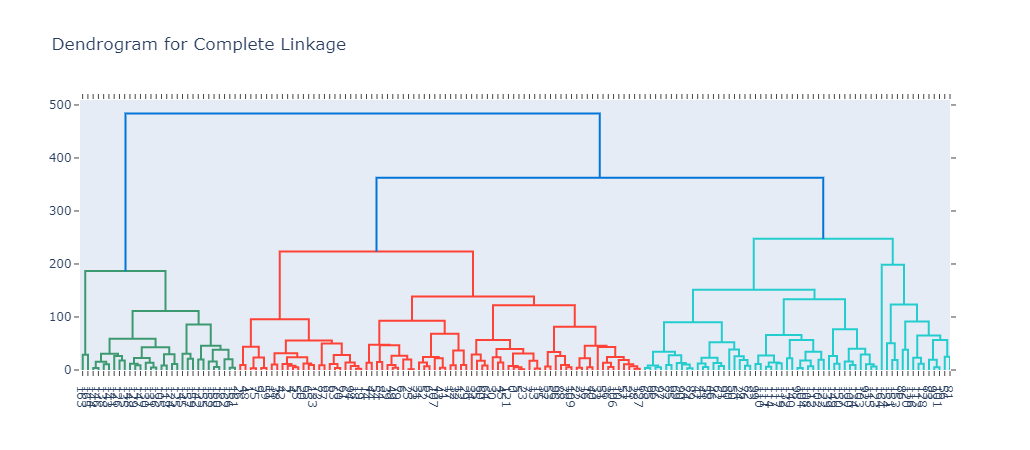

In [50]:
# let's build the Hierarchial Clustering using Complete linkage

mergings_complete= linkage(df_scaled, method= 'complete', metric= 'euclidean')

fig= ff.create_dendrogram(mergings_complete)
fig.update_layout(title_text= 'Dendrogram for Complete Linkage', width= 1500)
fig.show()

In [51]:
# Checking the cluster labels and merge it data frame 

cluster_labels_complete = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels_complete

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [52]:
# adding cluster labels to df

df['H_Cluster_Complete']= cluster_labels_complete

In [53]:
# let's name the Clusters 

df['H_Cluster_Complete']= df['H_Cluster_Complete'].map({0:'Cluster 1', 1:'Cluster 2', 2: 'Cluster 3'})
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  K_Cluster H_Cluster_Single  \
0       9.44        56.2       5.82    553.0  Cluster 1        Cluster 1   
1       4.49        76.3       1.65   4090.0  Cluster 2        Cluster 1   
2      16.10        76.5       2.89   4460.0  Cluster 2        Cluster 1   
3      22.40        60.1       6.16   3530.0  Cluster 1        Cluster 1   
4       1.44        76.8       2.13  12200.0  Cluster 2        Cluster 1   

  H_Cluster_Complete  
0          Cluster 1  
1          Cluster 1  
2          Cluster 1  
3          Cluster 1  
4          Cluster 1

<h2>
    <font color= 'Yellow'>
        <span style="font-family:Candara">Cluster Profiling of Hierarchial Clustering</span>
    </font>
</h2>

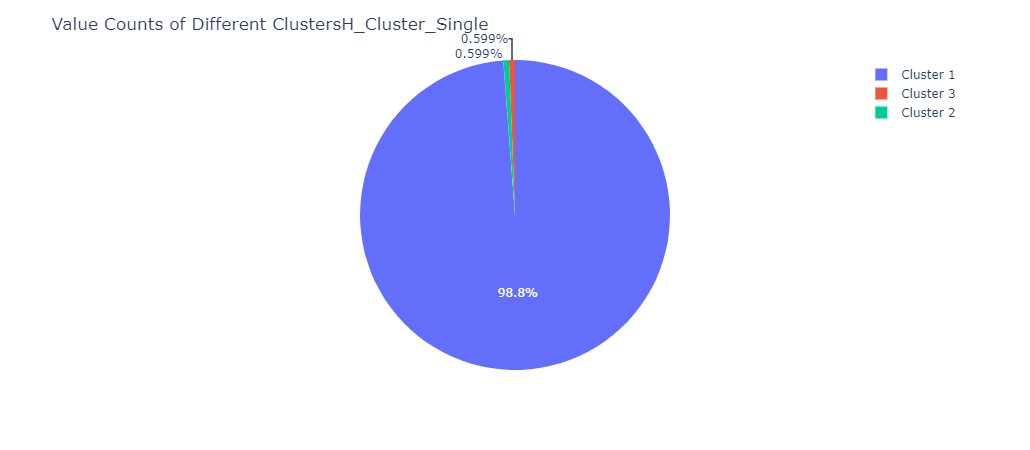

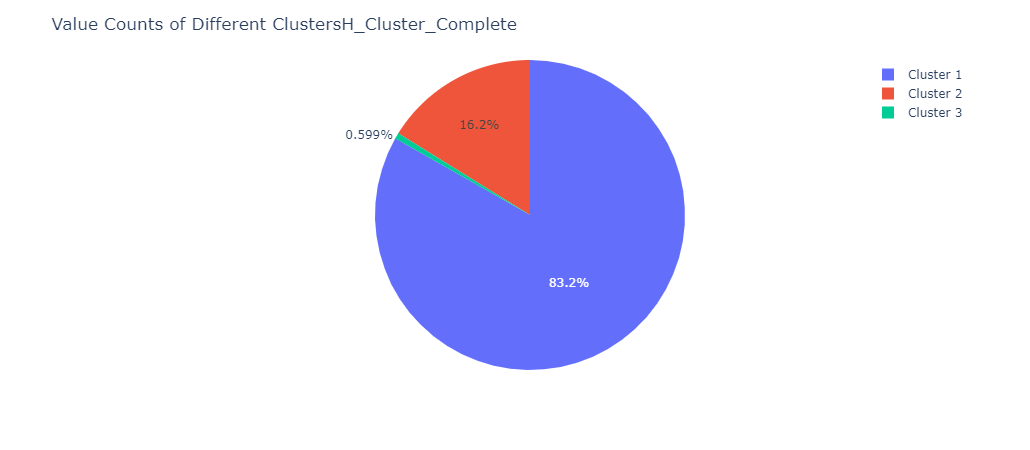

In [54]:
# let's check the value counts of cluster's of both Single & Complete linkage 

for i in ['H_Cluster_Single', 'H_Cluster_Complete']:
    fig= px.pie(names= df[i].value_counts().index, values= df[i].value_counts())
    fig.update_layout(title_text= 'Value Counts of Different Clusters' + str(i))
    fig.show()

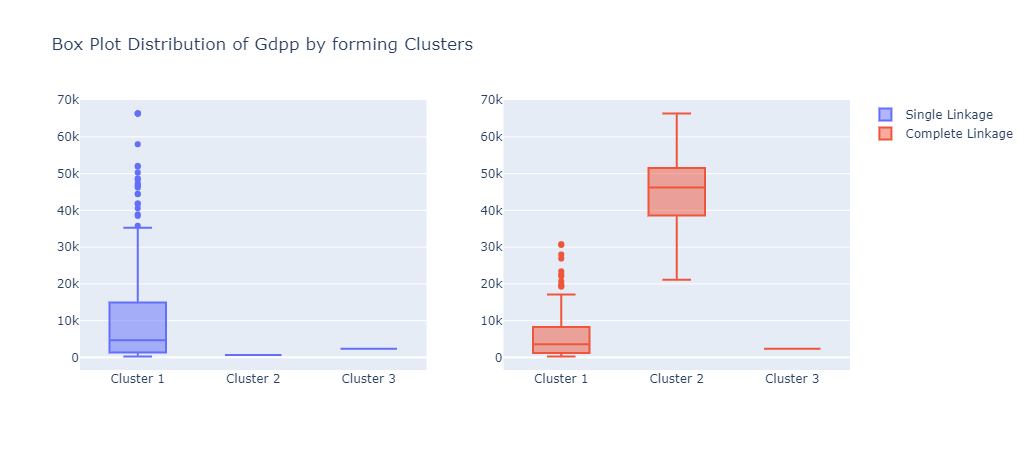

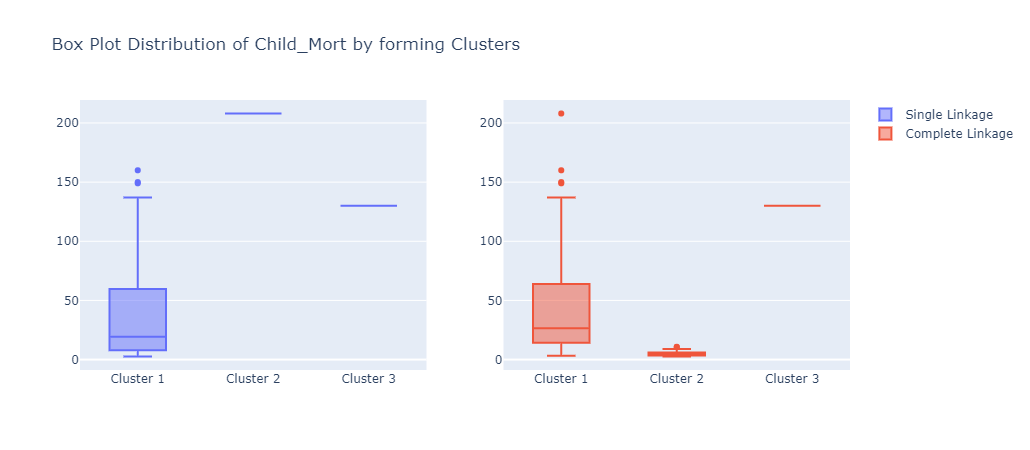

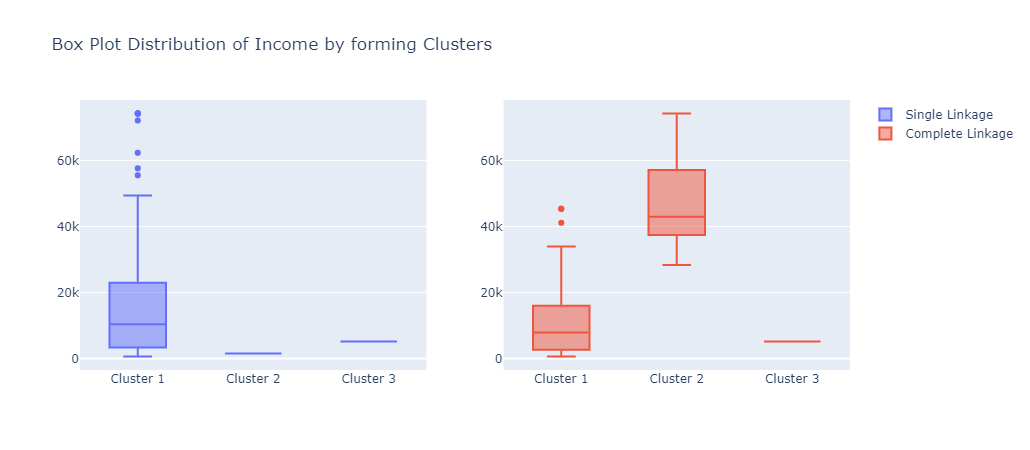

In [55]:
# let's plot the different boxplots of different clusters 
for col in ['gdpp', 'child_mort', 'income']: 
    fig= make_subplots(rows= 1, cols= 2)
    fig.add_trace(go.Box(y= df[col], x= df['H_Cluster_Single'], name= 'Single Linkage'),1,1)
    fig.add_trace(go.Box(y= df[col], x= df['H_Cluster_Complete'], name= 'Complete Linkage'),1,2)
    fig.update_layout(title_text= 'Box Plot Distribution of '+str(col).title() + ' by forming Clusters')
    fig.show()

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Inferences: </span>
    </font>
</h2>

- Since for both the type of Clustering Techniques in Hierarchial, there is much imbalance in the Clusters formed we can choose K Means Clustering for determining the countries which are in need of financial aid.

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">9. Selecting Countries For Financial Aid</span>
    </font>
</h1>

<h2>
    <font color= 'Orange'>
        <span style="font-family:Candara">Assumptions: </span>
    </font>
</h2>

- From the Hiererachial Clustering, since there is a high imbalance in the Cluster's we are choosing K Means Clustering for finding the top 5 countries that are in need for financial aid. 
- In the K Means Clustering, from the above calculations we have found that Cluster 1 is need for the financial Aid. Let's consider cluster1_K for finding the countries.

In [56]:
# let's check the cluster1_K head values 

cluster1_K.head()

country  child_mort   exports    health   imports   income  \
0    Afghanistan        90.2    55.300   41.9174   248.297   1610.0   
3         Angola       119.0  2199.190  100.6050  1514.370   5900.0   
17         Benin       111.0   180.404   31.0780   281.976   1820.0   
21      Botswana        52.5  2768.600  527.0500  3257.550  13300.0   
25  Burkina Faso       116.0   110.400   38.7550   170.200   1430.0   

    inflation  life_expec  total_fer    gdpp  K_Cluster  
0       9.440        56.2       5.82   553.0  Cluster 1  
3      22.400        60.1       6.16  3530.0  Cluster 1  
17      0.885        61.8       5.36   758.0  Cluster 1  
21      8.920        57.1       2.88  6350.0  Cluster 1  
25      6.810        57.9       5.87   575.0  Cluster 1

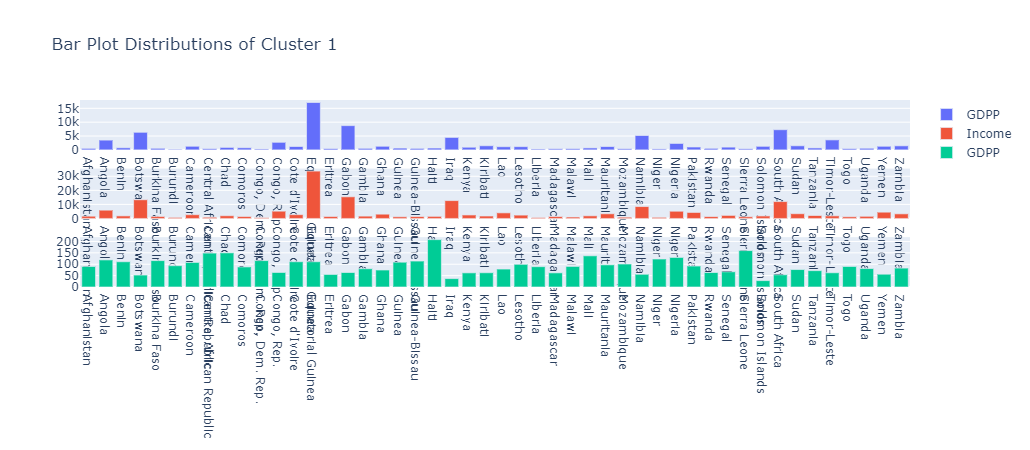

In [57]:
# let's plot the barplots for the GDPP, child_mort, income 

fig= make_subplots(rows= 3, cols= 1)
fig.add_trace(go.Bar(y= cluster1_K['gdpp'], x= cluster1_K['country'], name= 'GDPP'), 1,1)
fig.add_trace(go.Bar(y= cluster1_K['income'], x= cluster1_K['country'], name= 'Income'), 2,1)
fig.add_trace(go.Bar(y= cluster1_K['child_mort'], x= cluster1_K['country'], name= 'GDPP'), 3,1)
fig.update_layout(title_text= 'Bar Plot Distributions of Cluster 1', height= 1500)
fig.show()

Let's select the countries: 
- Having GDPP less than mean
- Having income less than mean 
- Having Child Mortality greater than mean

In [58]:
# let's select the countries based on the above 

needy_countries= cluster1_K.sort_values(by= ['gdpp', 'income', 'child_mort'], ascending= [True, True, False])[:5]

In [59]:
# let's check the top 5 countries 
needy= []
for i in list(needy_countries['country']): 
    needy.append(i)

In [60]:
# let's check the needy countries 

needy

['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone']

<h1>
    <font color= 'Yellow'>
        <span style="font-family:Candara">10. Conclusion</span>
    </font>
</h1>

- We have choosen K Means Clustering over the Hierarchial Clustering since the Cluster value counts are better in K Means. 
- Based upon the Cluster ID's in K Means clustering: 
    - Cluster 3 is having the higher mean of GDPP, Income and low Child Mortality 
    - Cluster 2 is having slightly lesser mean of GDPP, Income and little higher Child Mortality 
    - Cluster 1 is having very less mean of GDPP, Income and very high Child Mortality
- We are choosing Cluster 1 based on the mean values. 

<h1>
    <font color= 'Green'>
        <span style="font-family:Candara">Recomendations</span>
    </font>
</h1>

- The Countries which are in need for the financial aid are: 
    - Burundi
    - Liberia
    - Congo, Dem. Rep.
    - Niger
    - Sierra Leone
    
- These countries are having Low GDPP, Low Income and High Child Mortality. 
- The HELP NGO CEO can help these countries for the financial aid which are indire need of financial aid. If the Income increases, GDPP also increases and in which there will be a decrease in the Child Mortality Rate. 